<a href="https://colab.research.google.com/github/abeliansw/minGPT/blob/master/%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC1_10%ED%9A%8C_%EC%8B%A4%EC%8A%B53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 호출

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import scipy.stats as st

In [ ]:
# 시험용 필수 패키지가 아님(탐색용으로 활용)

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
# import sklearn
# import statsmodels # 회귀/로지스틱 분석, 분산분석, 시계열

# 기출문제1

In [ ]:
data1=pd.read_csv('Dataset_01.csv')

In [ ]:
data1.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
data1.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
q1_1=data1.isnull().sum().sum()
q1_1

26

In [ ]:
q1_2_list=['TV', 'Radio', 'Social_Media', 'Sales']

In [ ]:
q1_2=round(data1[q1_2_list].corr()['Sales'].drop('Sales').abs().max(),4)
q1_2

0.9995

In [ ]:
data1.isna().sum()

TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
a1=data1.dropna()

In [ ]:
st.pearsonr(a1.TV, a1.Radio)

(0.869158125089257, 0.0)

In [ ]:
data1.groupby('Influencer').sample(frac=0.1, random_state=123)

,TV,Radio,Social_Media,Influencer,Sales
3955,24.0,11.797969,5.560013,Macro,82.133472
1423,83.0,20.315681,1.682342,Macro,298.706397
413,34.0,9.529039,0.046325,Macro,122.398031
1080,28.0,10.372651,2.055377,Macro,97.558711
4416,25.0,9.788057,0.503683,Macro,92.848374
...,...,...,...,...,...
4495,66.0,14.560913,6.555528,Nano,234.684894
2112,23.0,5.723865,4.001563,Nano,84.596174
582,68.0,14.028806,1.276218,Nano,241.237428
1667,87.0,26.286863,1.777654,Nano,307.390096


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test=train_test_split(data1, test_size=0.3, random_state=1234)

### 회귀분석용 모듈

In [ ]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from statsmodels.formula.api import ols  # 선형회귀

In [ ]:
lm1=LinearRegression(fit_intercept=True)

- lm1.fit(X, y)

    - X: 2D, 결측치가 없어야 함
    - y: 1D, 결측치가 없어야 함

In [ ]:
data1.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
q1_3_X=['TV', 'Radio', 'Social_Media']

In [ ]:
q1_3=data1.dropna()

In [ ]:
lm1.fit(q1_3[q1_3_X], q1_3['Sales'])  # 학습, 학습 후 회귀계수와 상수/절편 리턴

LinearRegression()

In [ ]:
lm1.coef_  # 회귀계수(입력변수 순)

array([ 3.56256963, -0.00397039,  0.00496402])

In [ ]:
lm1.intercept_ # 상수/절편

-0.1339630519421462

In [ ]:
lm1.predict([[3,4,6]])  # 예측값 리턴, 입력 변수순으로 2차원으로 데이터 입력

array([10.56764839])

In [ ]:
var_list=['TV', 'Radio', 'Social_Media']

In [ ]:
q1_3=data1.dropna()

In [ ]:
lm01=LinearRegression(fit_intercept=True).fit(q1_3[var_list], q1_3['Sales'])

In [ ]:
q1_3_out=pd.Series(lm01.coef_, index=var_list)
q1_3_out

TV              3.562570
Radio          -0.003970
Social_Media    0.004964
dtype: float64

In [ ]:
np.trunc(q1_3_out.sort_values(ascending=False) * 1000) / 1000

TV              3.562
Social_Media    0.004
Radio          -0.003
dtype: float64

# 기출문제2

In [ ]:
data2=pd.read_csv('Dataset_02.csv')

In [ ]:
data2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
q2_1 = data2[['Sex', 'BP', 'Cholesterol']].value_counts(normalize=True)
q2_1[('F',    'HIGH',    'NORMAL')]

0.105

## Q2

In [ ]:
q2_2=data2.copy()

In [ ]:
# 결측치 구문 있는지 확인: 결측치 존재 시 결측치 처리 후 변수 변환

q2_2['Age_gr'] = np.where(q2_2.Age.isna(), np.nan,
                    np.where(q2_2.Age < 20, '10',
                        np.where(q2_2.Age < 30, '20',
                           np.where(q2_2.Age < 40, '30',
                              np.where(q2_2.Age < 50, '40',
                                 np.where(q2_2.Age < 60, '50', '60'))))))

In [ ]:
q2_2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40
3,28,F,NORMAL,HIGH,7.798,drugX,20
4,61,F,LOW,HIGH,18.043,DrugY,60
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50
196,16,M,LOW,HIGH,12.006,drugC,10
197,52,M,NORMAL,HIGH,9.894,drugX,50
198,23,M,NORMAL,NORMAL,14.020,drugX,20


In [ ]:
q2_2['Na_K_gr']=np.where(q2_2.Na_to_K <= 10, 'Lv1',
                   np.where(q2_2.Na_to_K <= 20, 'Lv2',
                      np.where(q2_2.Na_to_K <= 30, 'Lv3', 'Lv4')))

In [ ]:
q2_2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr,Na_K_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20,Lv3
1,47,M,LOW,HIGH,13.093,drugC,40,Lv2
2,47,M,LOW,HIGH,10.114,drugC,40,Lv2
3,28,F,NORMAL,HIGH,7.798,drugX,20,Lv1
4,61,F,LOW,HIGH,18.043,DrugY,60,Lv2


### 범주형 변수들 간의 독립성 검정: 카이스퀘어 검정

- 입력값: 교차표 작성
- 카이스퀘어 검정 수행

In [ ]:
tab=pd.crosstab(index=q2_2['Sex'], columns=q2_2['Drug'])
tab

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [ ]:
chi_out=st.chi2_contingency(tab)
chi_out

(2.119248418109203,
 0.7138369773987128,
 4,
 array([[43.68, 11.04,  7.68,  7.68, 25.92],
        [47.32, 11.96,  8.32,  8.32, 28.08]]))

In [ ]:
pvalue=chi_out[1]

In [ ]:
q2_2_out=[]

for i in ['Sex', 'BP', 'Cholesterol','Age_gr','Na_K_gr'] :

    tab=pd.crosstab(index=q2_2[i], columns=q2_2['Drug'])
    chi_out=st.chi2_contingency(tab)
    pvalue=chi_out[1]

    q2_2_out.append([i, chi_out[0], pvalue])


In [ ]:
q2_2_out

[['Sex', 2.119248418109203, 0.7138369773987128],
 ['BP', 143.2328718496999, 5.0417334144665895e-27],
 ['Cholesterol', 19.609657681313475, 0.0005962588389856497],
 ['Age_gr', 46.440652324723914, 0.0007010113024729462],
 ['Na_K_gr', 93.31006327437028, 1.1254641594413981e-14]]

In [ ]:
q2_2_out=pd.DataFrame(q2_2_out, columns=['var','chi','pvalue'])
q2_2_out

,var,chi,pvalue
0,Sex,2.119248,7.138370e-01
1,BP,143.232872,5.041733e-27
2,Cholesterol,19.609658,5.962588e-04
3,Age_gr,46.440652,7.010113e-04
4,Na_K_gr,93.310063,1.125464e-14


In [ ]:
q2_2_out2=q2_2_out[q2_2_out.pvalue < 0.05]

In [ ]:
q2_2_out2

,var,chi,pvalue
1,BP,143.232872,5.041733e-27
2,Cholesterol,19.609658,5.962588e-04
3,Age_gr,46.440652,7.010113e-04
4,Na_K_gr,93.310063,1.125464e-14


In [ ]:
len(q2_2_out2), np.trunc(q2_2_out2.pvalue.max() * 100000) / 100000

(4, 0.0007)

## Q3

In [ ]:
q2_3=data2.copy()

In [ ]:
q2_3.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
q2_3.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
# 변수변환
q2_3['Sex_cd'] = np.where(q2_3.Sex == 'M', 0, 1)
q2_3['BP_cd'] = np.where(q2_3.BP == 'LOW', 0, np.where(q2_3.BP == 'NORMAL',1, 2))
q2_3['Ch_cd'] = np.where(q2_3.Cholesterol == 'NORMAL',0,1)

In [ ]:
q2_3.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd,BP_cd,Ch_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1,2,1
1,47,M,LOW,HIGH,13.093,drugC,0,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,1,1
4,61,F,LOW,HIGH,18.043,DrugY,1,0,1


In [ ]:
q2_3.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Sex_cd', 'BP_cd',
       'Ch_cd'],
      dtype='object')

In [ ]:
q2_3_var_list=['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [ ]:
dt=DecisionTreeClassifier().fit(q2_3[q2_3_var_list], q2_3['Drug'])

In [ ]:
dt.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [ ]:
# q2_3_var_list=['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']
dt.feature_importances_

array([0.13595415, 0.47628234, 0.        , 0.26571772, 0.12204579])

[Text(223.20000000000002, 195.696, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(186.0, 152.208, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugX'),
 Text(111.60000000000001, 108.72, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugX'),
 Text(74.4, 65.232, 'Ch_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugX'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugX'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugC'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugX'),
 Text(260.40000000000003, 108.72, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugA'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drugA'),
 Text(297.6, 65.232,

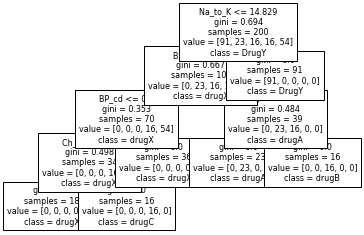

In [ ]:
plot_tree(dt, feature_names=q2_3_var_list,
          class_names=dt.classes_, fontsize=8, precision=3)

In [ ]:
print(export_text(dt, feature_names=q2_3_var_list, decimals=3))

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



# 기출문제3회

In [ ]:
data3=pd.read_csv('Dataset_03.csv')

In [ ]:
q3_1=data3.copy()

In [ ]:
q3_1['forehead_ratio']=q3_1['forehead_width_cm'] / q3_1['forehead_height_cm']

In [ ]:
q3_1.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
0,1,11.8,6.1,1,0,1,1,Male,1.934426
1,0,14.0,5.4,0,0,1,0,Female,2.592593
2,0,11.8,6.3,1,1,1,1,Male,1.873016
3,0,14.4,6.1,0,1,1,1,Male,2.360656
4,1,13.5,5.9,0,0,0,0,Female,2.288136


In [ ]:
xbar=q3_1['forehead_ratio'].mean()
std=q3_1['forehead_ratio'].std()

In [ ]:
LB=xbar - (3*std)
UB=xbar + (3*std)

In [ ]:
# 이상치
len(q3_1[(q3_1['forehead_ratio'] < LB) | (q3_1['forehead_ratio'] > UB)])

3

In [ ]:
# 정상
# q3_1[~((q3_1['forehead_ratio'] < LB) | (q3_1['forehead_ratio'] > UB))]

In [ ]:
q3_2=data3.copy()

In [ ]:
q3_2.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
q3_2['forehead_ratio']=q3_2['forehead_width_cm'] / q3_2['forehead_height_cm']

### 독립인 이표본 t 검정

- 등분산 검정 키워드 확인

In [ ]:
M = q3_2[q3_2.gender=='Male']['forehead_ratio']
F = q3_2[q3_2.gender=='Female']['forehead_ratio']

In [ ]:
q3_2_out=st.ttest_ind(M, F, equal_var=False)
q3_2_out

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

In [ ]:
round(abs(q3_2_out.statistic),3), q3_2_out.pvalue < 0.01

(2.999, True)

## Q3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score

In [ ]:
# 데이터 분할
train, test = train_test_split(data3, test_size=0.3, random_state=123)

In [ ]:
len(data3), len(train), len(test)

(5001, 3500, 1501)

In [ ]:
train.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
# 입력 변수 리스트

q3_3_var_list=train.columns.drop('gender')
q3_3_var_list

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

In [ ]:
train.gender.value_counts()

Female    1758
Male      1742
Name: gender, dtype: int64

In [ ]:
# 알파벳 순으로 y 레이블 매칭
logit=LogisticRegression().fit(train[q3_3_var_list], train['gender'])

In [ ]:
q3_3_pred=logit.predict(test[q3_3_var_list])
q3_3_pred

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [ ]:
q3_3_pred_pr=logit.predict_proba(test[q3_3_var_list])
q3_3_pred_pr

array([[2.13366044e-02, 9.78663396e-01],
       [8.97496054e-05, 9.99910250e-01],
       [2.54440411e-01, 7.45559589e-01],
       ...,
       [9.63308173e-01, 3.66918274e-02],
       [8.55088606e-05, 9.99914491e-01],
       [1.37076239e-04, 9.99862924e-01]])

In [ ]:
np.where(q3_3_pred_pr[:,1] >= 0.6, 'Male', 'Female')

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'], dtype='<U6')

In [ ]:
round(precision_score(test['gender'], q3_3_pred, pos_label='Male'),2)

0.96

In [ ]:
print(classification_report(test['gender'], q3_3_pred))

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# 기출문제 4회

In [ ]:
data4=pd.read_csv('Dataset_04.csv')

In [ ]:
data4.columns

Index(['LOCATION', 'SUBJECT', 'TIME', 'Value'], dtype='object')

In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  6718 non-null   object 
 1   SUBJECT   6718 non-null   object 
 2   TIME      6718 non-null   int64  
 3   Value     6718 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 210.1+ KB


In [ ]:
q4_1=data4[data4.LOCATION == 'KOR']

In [ ]:
data4.LOCATION.value_counts()

IND      148
PRY      148
IRN      148
ISR      148
CAN      148
MYS      148
MOZ      148
NGA      148
PAK      148
PER      148
URY      148
PHL      148
ZMB      148
SAU      148
ZAF      148
SDN      148
TZA      148
THA      148
IDN      148
VNM      148
HTI      148
MEX      148
SSA      148
EGY      148
COL      148
JPN      148
CHL      148
BRA      148
BGD      148
GHA      148
DZA      148
USA      148
TUR      148
NZL      148
ARG      147
CHN      147
KOR      146
AUS      146
KAZ      140
UKR      140
RUS      139
BRICS    139
EU28     138
OECD     137
ETH      136
WLD      131
Name: LOCATION, dtype: int64

In [ ]:
q4_1_2=q4_1.groupby('TIME')['Value'].sum().reset_index()
q4_1_2

,TIME,Value
0,1990,5.774255
1,1991,21.911207
2,1992,26.901769
3,1993,26.938255
4,1994,27.877341
5,1995,30.042035
6,1996,31.928922
7,1997,32.002991
8,1998,30.009057
9,1999,35.383138


In [ ]:
round(q4_1_2.corr()['TIME']['Value'],2)

0.96

In [ ]:
q4_2=data4[data4.LOCATION.isin(['KOR','JPN'])]

In [ ]:
q4_2.SUBJECT.drop_duplicates()

294       BEEF
331        PIG
368    POULTRY
405      SHEEP
Name: SUBJECT, dtype: object

In [ ]:
obj_list=q4_2.SUBJECT.unique()
obj_list

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [ ]:

temp=q4_2[q4_2.SUBJECT=='BEEF']

tab=pd.pivot_table(data=temp,
                  index='TIME', columns='LOCATION',
                  values='Value').dropna()
st.ttest_rel(tab['JPN'], tab['KOR'])

Ttest_relResult(statistic=-3.956315918475474, pvalue=0.0003541915661863236)

In [ ]:
tab

LOCATION,JPN,KOR
TIME,,
1991,6.517055,5.085481
1992,6.766244,5.685434
1993,7.406407,5.325765
1994,8.129090,5.698819
1995,8.535522,6.568429
1996,8.084060,6.829306
1997,8.191633,7.729010
1998,8.307415,6.969364
1999,8.293816,8.279547


In [ ]:
q4_2_out=[]
for i in obj_list:
    temp=q4_2[q4_2.SUBJECT==i]

    tab=pd.pivot_table(data=temp,
                      index='TIME', columns='LOCATION',
                      values='Value').dropna()
    ttest_out=st.ttest_rel(tab['JPN'], tab['KOR'])

    q4_2_out.append([i, ttest_out.statistic, ttest_out.pvalue])

In [ ]:
q4_2_out = pd.DataFrame(q4_2_out, columns=['var', 't', 'pvalue'])
q4_2_out

,var,t,pvalue
0,BEEF,-3.956316,3.541916e-04
1,PIG,-9.055646,1.063500e-10
2,POULTRY,0.731743,4.690626e-01
3,SHEEP,4.650669,4.346643e-05


In [ ]:
q4_2_out[q4_2_out.pvalue > 0.05]['var']

2    POULTRY
Name: var, dtype: object

## Q3

In [ ]:
# 한국 데이터 필터링

q4_3 = data4[data4.LOCATION == 'KOR']

In [ ]:
q4_3.columns

Index(['LOCATION', 'SUBJECT', 'TIME', 'Value'], dtype='object')

In [ ]:
sub_list = q4_3.SUBJECT.unique()
sub_list

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 육류 종류별 데이터셋 필터링
temp = q4_3[q4_3.SUBJECT == 'BEEF']

In [ ]:
lm=LinearRegression().fit(temp[['TIME']], temp['Value'])

In [ ]:
r2=lm.score(temp[['TIME']], temp['Value'])
r2

0.835455805530312

In [ ]:
pred = lm.predict(temp[['TIME']])
pred

array([ 5.72341431,  5.87801722,  6.03262013,  6.18722305,  6.34182596,
        6.49642887,  6.65103178,  6.8056347 ,  6.96023761,  7.11484052,
        7.26944343,  7.42404635,  7.57864926,  7.73325217,  7.88785509,
        8.042458  ,  8.19706091,  8.35166382,  8.50626674,  8.66086965,
        8.81547256,  8.97007547,  9.12467839,  9.2792813 ,  9.43388421,
        9.58848712,  9.74309004,  9.89769295, 10.05229586, 10.20689877,
       10.36150169, 10.5161046 , 10.67070751, 10.82531042, 10.97991334,
       11.13451625])

In [ ]:
mape = (abs(temp['Value'] - pred) / temp['Value']).mean() * 100
mape

7.310893225858994

In [ ]:
q4_3_out=[]

for i in sub_list:

    temp = q4_3[q4_3.SUBJECT == i]
    lm=LinearRegression().fit(temp[['TIME']], temp['Value'])
    r2=lm.score(temp[['TIME']], temp['Value'])
    pred = lm.predict(temp[['TIME']])
    mape = (abs(temp['Value'] - pred) / temp['Value']).mean() * 100

    q4_3_out.append([i, r2, mape])

In [ ]:
q4_3_out = pd.DataFrame(q4_3_out, columns=['sub','r2','mape'])
q4_3_out

,sub,r2,mape
0,BEEF,0.835456,7.310893
1,PIG,0.940681,5.634980
2,POULTRY,0.951498,5.783358
3,SHEEP,0.004083,33.347966


In [ ]:
# 답
round(q4_3_out.loc[q4_3_out.r2.idxmax(), 'mape'],2)

5.78

# 기출문제5

In [ ]:
data5=pd.read_csv('Dataset_05.csv', na_values=[' ',''])

In [ ]:
data5.head()

,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,462809,22,30,1,1.0,4.0,1,1,6,2,4,NaN
1,462643,38,40,0,NaN,3.0,2,2,3,0,4,A
2,466315,67,70,0,1.0,1.0,2,2,3,2,6,NaN
3,461735,67,70,1,0.0,2.0,2,2,8,1,6,B
4,462669,40,40,0,NaN,6.0,2,2,4,1,6,A


In [ ]:
data5.dtypes

ID                   int64
Age                  int64
Age_gr               int64
Gender               int64
Work_Experience    float64
Family_Size        float64
Ever_Married         int64
Graduated            int64
Profession           int64
Spending_Score       int64
Var_1                int64
Segmentation        object
dtype: object

In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Age              8068 non-null   int64  
 2   Age_gr           8068 non-null   int64  
 3   Gender           8068 non-null   int64  
 4   Work_Experience  7239 non-null   float64
 5   Family_Size      7733 non-null   float64
 6   Ever_Married     8068 non-null   int64  
 7   Graduated        8068 non-null   int64  
 8   Profession       8068 non-null   int64  
 9   Spending_Score   8068 non-null   int64  
 10  Var_1            8068 non-null   int64  
 11  Segmentation     8066 non-null   object 
dtypes: float64(2), int64(9), object(1)
memory usage: 756.5+ KB


In [ ]:
q5_1=data5.isna().sum().sum()
q5_1

1166

## Q2

In [ ]:
q5_2 = data5.dropna()

In [ ]:
q5_2_tab=pd.crosstab(index=q5_2.Gender, columns=q5_2.Segmentation)

In [ ]:
q5_2_chi = st.chi2_contingency(q5_2_tab)
round(q5_2_chi[1],4), q5_2_chi[1] < 0.05

(0.0031, True)

## Q3

In [ ]:
q5_3 = q5_2[q5_2.Segmentation.isin(['A','D'])]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(q5_3, test_size=0.3, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt=DecisionTreeClassifier(max_depth=7, random_state=123)

In [ ]:
train.columns

Index(['ID', 'Age', 'Age_gr', 'Gender', 'Work_Experience', 'Family_Size',
       'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
q5_3_var_list=['Age_gr', 'Gender', 'Work_Experience', 'Family_Size',
               'Ever_Married', 'Graduated', 'Spending_Score']

In [ ]:
dt.fit(train[q5_3_var_list], train['Segmentation'])

DecisionTreeClassifier(max_depth=7, random_state=123)

In [ ]:
# 답
np.trunc(dt.score(test[q5_3_var_list], test['Segmentation']) * 100) / 100

0.68

# 기출문제6

In [ ]:
data6 = pd.read_csv('Dataset_06.csv')
data6

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,7663700531,20150106T000000,325000.0,2,1.00,620,14823,1.0,0,0,3,6,620,0,1926,0,98125,1400,7930
4319,7399200770,20141209T000000,417400.0,3,3.00,2680,12285,1.0,0,0,4,8,2680,0,1970,0,98055,2610,9558
4320,1324300126,20150313T000000,415000.0,2,2.50,1160,1219,3.0,0,0,3,8,1160,0,2007,0,98107,1320,2800
4321,8562750250,20140704T000000,600000.0,3,2.50,2320,7609,2.0,0,0,3,8,2320,0,2003,0,98027,2590,4000


In [ ]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   price          4323 non-null   float64
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  sqft_living15  4323 non-null   int64  
 18  sqft_lot

In [ ]:
data6.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
waterfront_y = data6[data6.waterfront ==1]['price']
waterfront_n = data6[data6.waterfront ==0]['price']

In [ ]:
len(waterfront_y),len(waterfront_n)

(33, 4290)

In [ ]:
waterfront_y.mean()

1699437.878787879

In [ ]:
waterfront_n.mean()

532165.1307692308

In [ ]:
np.trunc(abs(waterfront_y.mean()-waterfront_n.mean()))

1167272.0

In [ ]:
1167272

1167272

In [ ]:
var_list = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','yr_built']

In [ ]:
data6[var_list].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
price,1.000000,0.279824,0.534277,0.709157,0.106341,0.270423,0.059895
bedrooms,0.279824,1.000000,0.468611,0.517502,0.017658,0.151279,0.137440
bathrooms,0.534277,0.468611,1.000000,0.751835,0.105676,0.495845,0.509019
sqft_living,0.709157,0.517502,0.751835,1.000000,0.180408,0.368670,0.323522
sqft_lot,0.106341,0.017658,0.105676,0.180408,1.000000,0.032762,0.062490
floors,0.270423,0.151279,0.495845,0.368670,0.032762,1.000000,0.505070
yr_built,0.059895,0.137440,0.509019,0.323522,0.062490,0.505070,1.000000


In [ ]:
data6[var_list].corr()['price'].drop('price').abs().sort_values(ascending=False)

sqft_living    0.709157
bathrooms      0.534277
bedrooms       0.279824
floors         0.270423
sqft_lot       0.106341
yr_built       0.059895
Name: price, dtype: float64

In [ ]:
data6[var_list].corr()['price'].drop('price').abs().max()

0.7091565835706303

In [ ]:
#max:sqft_living, min: yr_built

In [ ]:
var_list2 = []

In [ ]:
var_list2 = data6.columns.drop(['id','date','zipcode']).drop('price')

In [ ]:
var_list2 = data6.columns.drop(['id','date','zipcode']).drop('price')
var_list2

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [ ]:
len(var_list2)

15

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
formula = 'price~' + '+'.join(var_list2)
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [ ]:
ols1 = ols(formula,data6)
ols1

In [ ]:
ols_out = ols1.fit()

In [ ]:
ols_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:06:22   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3080      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5722      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.58e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
ols_out.pvalues.sort_values(ascending=False)

sqft_lot          9.532159e-01
sqft_lot15        1.017748e-01
yr_renovated      3.226128e-02
condition         3.157318e-03
sqft_living15     2.352216e-03
floors            4.266372e-06
sqft_above        1.431345e-11
bedrooms          1.262643e-11
bathrooms         5.681393e-13
view              5.028272e-17
sqft_basement     2.030015e-23
waterfront        1.931929e-56
sqft_living       2.616953e-71
Intercept         1.204633e-96
yr_built         1.717539e-122
grade            1.760208e-156
dtype: float64

In [ ]:
ols_out2 = ols_out.pvalues.drop('Intercept')

In [ ]:
(ols_out2 < 0.05).sum()

13

In [ ]:
ols_out3 = ols_out.params.drop(['sqft_lot','sqft_lot15','Intercept'])
ols_out3

bedrooms         -24995.525070
bathrooms         51792.344459
sqft_living          92.308047
floors            37481.990454
waterfront       627652.843940
view              40397.783242
condition         15705.734137
grade            130627.395937
sqft_above           33.735791
sqft_basement        58.572248
yr_built          -3666.895673
yr_renovated         17.703192
sqft_living15        23.011443
dtype: float64

In [ ]:
(ols_out3 < 0).sum()

2

In [ ]:
(13,2)

(13, 2)

In [ ]:
data6=pd.read_csv('Dataset_06.csv')

In [ ]:
data6.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380


In [ ]:
data6.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   price          4323 non-null   float64
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  sqft_living15  4323 non-null   int64  
 18  sqft_lot

In [ ]:
data6.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
q6_1_1 = data6[data6.waterfront == 1]['price'].mean()
q6_1_0 = data6[data6.waterfront == 0]['price'].mean()

In [ ]:
int(abs(q6_1_1 - q6_1_0))

1167272

In [ ]:
data6.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
q6_2_list=['price', 'bedrooms', 'bathrooms', 'sqft_living',
           'sqft_lot', 'floors', 'yr_built']

In [ ]:
q6_2=data6[q6_2_list].corr()['price'].drop('price').abs()
q6_2

bedrooms       0.279824
bathrooms      0.534277
sqft_living    0.709157
sqft_lot       0.106341
floors         0.270423
yr_built       0.059895
Name: price, dtype: float64

In [ ]:
q6_2.idxmax(), q6_2.idxmin()

('sqft_living', 'yr_built')

## Q3

In [ ]:
q6_3_var_list=data6.columns.drop(['id','date','zipcode','price'])
len(q6_3_var_list), q6_3_var_list

(15,
 Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
        'sqft_lot15'],
       dtype='object'))

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
# form1='price~' + '+'.join(q6_3_var_list)  + '-1'  # 상수항 미포함
form1='price~' + '+'.join(q6_3_var_list) # 상수항 포함
form1

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [ ]:
ols1=ols(form1, data6).fit()

In [ ]:
# t-pvalue로 유의미한 변수 추출

rej_list=ols1.pvalues.index[ols1.pvalues < 0.05].drop('Intercept')
rej_list

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15'],
      dtype='object')

In [ ]:
# 답
# 회귀계수
len(rej_list), (ols1.params[rej_list] < 0).sum()

(13, 2)

# 기출문제7

In [ ]:
data7 = pd.read_csv('Dataset_07.csv')
data7.head()

,Serial_No,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          400 non-null    int64  
 1   GRE                400 non-null    int64  
 2   TOEFL              400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data7.columns

Index(['Serial_No', 'GRE', 'TOEFL', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [ ]:
var_list = ['GRE', 'TOEFL', 'CGPA','Chance_of_Admit']

In [ ]:
data7[var_list].corr()

,GRE,TOEFL,CGPA,Chance_of_Admit
GRE,1.000000,0.835977,0.833060,0.802610
TOEFL,0.835977,1.000000,0.828417,0.791594
CGPA,0.833060,0.828417,1.000000,0.873289
Chance_of_Admit,0.802610,0.791594,0.873289,1.000000


In [ ]:
data7[var_list].corr()['Chance_of_Admit'].drop('Chance_of_Admit').idxmax()

'CGPA'

In [ ]:
data7[var_list].corr()['Chance_of_Admit'].drop('Chance_of_Admit').max()

0.8732890993553003

In [ ]:
round(data7[var_list].corr()['Chance_of_Admit'].drop('Chance_of_Admit').max(),3)


0.873

In [ ]:
0.873

0.873

In [ ]:
xbar = data7.GRE.mean()
xbar

316.8075

In [ ]:
up = data7[data7.GRE >= xbar]['CGPA']
down = data7[data7.GRE < xbar]['CGPA']

In [ ]:
len(up),len(down)

(205, 195)

In [ ]:
import scipy.stats as st

In [ ]:
ttest_out = st.ttest_ind(up,down,equal_var=True)
ttest_out

Ttest_indResult(statistic=19.443291692470982, pvalue=1.1127037052806161e-59)

In [ ]:
ttest_out.pvalue < 0.05

True

In [ ]:
ttest_out.statistic

19.443291692470982

In [ ]:
round(ttest_out.statistic,2)

19.44

In [ ]:
var_list2 = data7.columns.drop(['Serial_No','Chance_of_Admit'])
var_list2

Index(['GRE', 'TOEFL', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research'], dtype='object')

In [ ]:
data7['admitYN']=np.where(data7.Chance_of_Admit >0.5,1,0)
data7

,Serial_No,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,admitYN
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,1
396,397,325,107,3,3.0,3.5,9.11,1,0.84,1
397,398,330,116,4,5.0,4.5,9.45,1,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0,0.67,1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#logit = LogisticRegression(random_state=123,solver='liblinear',fit_intercept=False).fit(data7[var_list2],data7['admitYN'])

logit = LogisticRegression(random_state=123,solver='liblinear',fit_intercept=False).fit(data7[var_list2],data7['admitYN'])

In [ ]:
?LogisticRegression

In [ ]:
?logit.score

In [ ]:
coef = logit.coef_[0]
coef

array([-0.08902317,  0.10784699,  0.06166989, -0.24350777,  1.00792388,
        1.95535506,  0.67460593])

In [ ]:
abs(coef).max()

1.955355062462584

In [ ]:
abs(coef).max()

1.955355062462584

In [ ]:
round(abs(coef).max(),2)

1.96

In [ ]:
#CGPA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data7=pd.read_csv('Dataset_07.csv')

In [ ]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          400 non-null    int64  
 1   GRE                400 non-null    int64  
 2   TOEFL              400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data7.columns

Index(['Serial_No', 'GRE', 'TOEFL', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

## Q1

In [ ]:
q7_1_var_list=['GRE', 'TOEFL','CGPA', 'Chance_of_Admit']

In [ ]:
q7_1=data7[q7_1_var_list].corr()['Chance_of_Admit'].drop('Chance_of_Admit')
q7_1

GRE      0.802610
TOEFL    0.791594
CGPA     0.873289
Name: Chance_of_Admit, dtype: float64

In [ ]:
# 답
round(q7_1.abs().max(),3)

0.873

## Q2

In [ ]:
q7_2_1=data7[data7.GRE >= data7.GRE.mean()]['CGPA']
q7_2_0=data7[data7.GRE < data7.GRE.mean()]['CGPA']

In [ ]:
import scipy.stats as st

In [ ]:
q7_2_out=st.ttest_ind(q7_2_1, q7_2_0, equal_var=True)
q7_2_out

Ttest_indResult(statistic=19.443291692470982, pvalue=1.1127037052806161e-59)

In [ ]:
# 답
round(abs(q7_2_out.statistic),2)

19.44

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
q7_3=data7.copy()

In [ ]:
q7_3['group'] = np.where(q7_3.Chance_of_Admit > 0.5, 1, 0)

In [ ]:
q7_3_list=q7_3.columns.drop(['Serial_No','Chance_of_Admit', 'group'])
q7_3_list

Index(['GRE', 'TOEFL', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research'], dtype='object')

In [ ]:
logit=LogisticRegression(fit_intercept=False, solver='liblinear', random_state=123)
logit.fit(q7_3[q7_3_list], q7_3['group'])

LogisticRegression(fit_intercept=False, random_state=123, solver='liblinear')

In [ ]:
logit.coef_[0]

array([-0.08902317,  0.10784699,  0.06166989, -0.24350777,  1.00792388,
        1.95535506,  0.67460593])

In [ ]:
# 답
q7_3_out=pd.Series(logit.coef_[0], index=q7_3_list).abs()
q7_3_out.idxmax(), round(q7_3_out.max(),2)

('CGPA', 1.96)

In [ ]:
data8 = pd.read_csv('Dataset_08.csv')
data8.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data8.columns

Index(['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [ ]:
data8.State.value_counts(normalize=True).sort_index(ascending=True)

California    0.34
Florida       0.32
New York      0.34
Name: State, dtype: float64

In [ ]:
aa = data8.State.value_counts(normalize=True,sort=True)
aa

New York      0.34
California    0.34
Florida       0.32
Name: State, dtype: float64

In [ ]:
aa[0]/50

0.0068000000000000005

In [ ]:
#California/Florida/New York  0.34,0.32,0.34

In [ ]:
tab1 = pd.pivot_table(data8,index='State',values='Profit')
tab1

,Profit
State,
California,103905.175294
Florida,118774.024375
New York,113756.446471


In [ ]:
diff = tab1.Profit.max()-tab1.Profit.min()
diff

14868.849080882355

In [ ]:
np.trunc(diff)

14868.0

In [ ]:
14868

14868

In [ ]:
var_list= ['RandD_Spend', 'Administration', 'Marketing_Spend']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
state_list = data8.State.unique()

In [ ]:
out_list = []

for i in state_list:
    data8_i = data8[data8.State == i]
    lm1 = LinearRegression().fit(data8_i[var_list],data8_i['Profit'])
    pred = lm1.predict(data8_i[var_list])
    mape = mean_absolute_percentage_error(data8_i['Profit'],pred)*100
    mape2 = abs((data8_i['Profit']-pred)/data8_i['Profit']).mean()*100
    out_list.append([i,mape,mape2])

out_d = pd.DataFrame(out_list,columns=['State','MAPE','MAPE2'])
out_d

,State,MAPE,MAPE2
0,New York,8.524248,8.524248
1,California,15.227582,15.227582
2,Florida,5.706713,5.706713


In [ ]:
'Florida', round(out_d['MAPE'][2],2)

('Florida', 5.71)

# 기출문제8

In [ ]:
data8=pd.read_csv('Dataset_08.csv')

In [ ]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data8.columns

Index(['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

## Q1

In [ ]:
# 답
np.round(data8.State.value_counts(normalize=True),2).sort_index().values

array([0.34, 0.32, 0.34])

## Q2

In [ ]:
# 답
q8_2=data8.groupby('State')['Profit'].mean()
int(q8_2.max() - q8_2.min())

14868

In [ ]:
data8.columns

Index(['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [ ]:
q8_3_list = ['RandD_Spend', 'Administration', 'Marketing_Spend']

In [ ]:
state_list=data8.State.unique()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
q8_3_out=[]

for i in state_list:
    temp=data8[data8.State == i]
    lm=LinearRegression().fit(temp[q8_3_list], temp['Profit'])
    pred=lm.predict(temp[q8_3_list])
    mape=(abs(temp['Profit'] - pred) / temp['Profit']).mean() * 100
    q8_3_out.append([i, mape])

In [ ]:
q8_3_out=pd.DataFrame(q8_3_out, columns=['var','mape'])
q8_3_out

,var,mape
0,New York,8.524248
1,California,15.227582
2,Florida,5.706713


In [ ]:
# 답
q8_3_out.loc[q8_3_out.mape.idxmin(),'var'], round(q8_3_out.mape.min(),2)

('Florida', 5.71)

## 별도 코드: 그룹별 모델 만들기

In [ ]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import pandas as pd\nimport numpy as np',
  'import scipy.stats as st',
  '# 시험용 필수 패키지가 아님(탐색용으로 활용)\n\nimport matplotlib.pyplot as plt\nimport seaborn as sns',
  "get_ipython().run_line_magic('matplotlib', 'inline')",
  '# import sklearn\n# import statsmodels # 회귀/로지스틱 분석, 분산분석, 시계열',
  "data1=pd.read_csv('Dataset_01.csv')",
  'data1.head()',
  'data1.info()',
  'data1.columns',
  'q1_1=data1.isnull().sum().sum()\nq1_1',
  "q1_2_list=['TV', 'Radio', 'Social_Media', 'Sales']",
  "q1_2=round(data1[q1_2_list].corr()['Sales'].drop('Sales').abs().max(),4)\nq1_2",
  'data1.isna().sum()',
  'a1=data1.dropna()',
  'st.pearsonr(a1.TV, a1.Radio)',
  "data1.groupby('Influencer').sample(frac=0.1, random_state=123)",
  'f

In [ ]:
state_list=['New York', 'California', 'Florida']

for i in state_list:
    temp=data8[data8.State == i]

    globals()['lm_'+ i]=LinearRegression().fit(temp[q8_3_list], temp['Profit'])

In [ ]:
lm_Florida

LinearRegression()

In [ ]:
pred=lm_Florida.predict(temp[q8_3_list])
mape=(abs(temp['Profit'] - pred) / temp['Profit']).mean() * 100

# 기출문제9

In [ ]:
data9 = pd.read_csv('Dataset_09.csv')
data9.head()

,satisfaction,Gender,Age,Customer_Type,Class,Flight_Distance,Seat_comfort,Food_and_drink,Inflight_wifi_service,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,19.0,Loyal Customer,Eco,1981.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,3.0,28.0
1,dissatisfied,Female,64.0,Loyal Customer,Eco,2847.0,1.0,1.0,1.0,2.0,5.0,3.0,4.0,4.0,111.0,133.0
2,dissatisfied,Male,55.0,Loyal Customer,Eco,3790.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,2.0,15.0
3,satisfied,Female,39.0,Loyal Customer,Eco,1741.0,4.0,4.0,5.0,4.0,1.0,1.0,5.0,5.0,2.0,0.0
4,dissatisfied,Female,29.0,Loyal Customer,Eco,3829.0,2.0,1.0,1.0,4.0,2.0,4.0,3.0,1.0,365.0,383.0


In [ ]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   satisfaction                2000 non-null   object 
 1   Gender                      2000 non-null   object 
 2   Age                         2000 non-null   float64
 3   Customer_Type               2000 non-null   object 
 4   Class                       2000 non-null   object 
 5   Flight_Distance             2000 non-null   float64
 6   Seat_comfort                2000 non-null   float64
 7   Food_and_drink              2000 non-null   float64
 8   Inflight_wifi_service       2000 non-null   float64
 9   Inflight_entertainment      2000 non-null   float64
 10  Onboard_service             2000 non-null   float64
 11  Leg_room_service            2000 non-null   float64
 12  Baggage_handling            2000 non-null   float64
 13  Cleanliness                 2000 

In [ ]:
data9.isna().sum().sum()

5

In [ ]:
5

5

In [ ]:
q9 = data9.dropna()
len(q9)

1995

In [ ]:
len(q9.columns)

16

In [ ]:
q9.columns

Index(['satisfaction', 'Gender', 'Age', 'Customer_Type', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Food_and_drink',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

In [ ]:
q9['Age_gr']= np.where(q9.Age <=20, 10,
                      np.where(q9.Age <=30, 20,
                              np.where(q9.Age <=40, 30,
                                      np.where(q9.Age <=50, 40,
                                              np.where(q9.Age <=60, 50,60)))))
q9

C:\Users\MYCOM\AppData\Local\Temp/ipykernel_17984/2240078749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q9['Age_gr']= np.where(q9.Age <=20, 10,


,satisfaction,Gender,Age,Customer_Type,Class,Flight_Distance,Seat_comfort,Food_and_drink,Inflight_wifi_service,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Age_gr
0,satisfied,Female,19.0,Loyal Customer,Eco,1981.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,3.0,28.0,10
1,dissatisfied,Female,64.0,Loyal Customer,Eco,2847.0,1.0,1.0,1.0,2.0,5.0,3.0,4.0,4.0,111.0,133.0,60
2,dissatisfied,Male,55.0,Loyal Customer,Eco,3790.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,2.0,15.0,50
3,satisfied,Female,39.0,Loyal Customer,Eco,1741.0,4.0,4.0,5.0,4.0,1.0,1.0,5.0,5.0,2.0,0.0,30
4,dissatisfied,Female,29.0,Loyal Customer,Eco,3829.0,2.0,1.0,1.0,4.0,2.0,4.0,3.0,1.0,365.0,383.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,satisfied,Female,65.0,Loyal Customer,Eco,429.0,0.0,0.0,5.0,4.0,4.0,0.0,4.0,4.0,1.0,0.0,60
1996,dissatisfied,Male,62.0,Loyal Customer,Eco Plus,2407.0,1.0,1.0,2.0,1.0,5.0,3.0,4.0,4.0,1.0,0.0,60
1997,satisfied,Female,24.0,Loyal Customer,Eco,4294.0,1.0,1.0,5.0,4.0,3.0,4.0,3.0,3.0,1.0,0.0,20
1998,dissatisfied,Male,12.0,Loyal Customer,Business,1815.0,2.0,2.0,4.0,2.0,3.0,5.0,3.0,1.0,56.0,60.0,10


In [ ]:
var_list = ['Age_gr','Gender','Customer_Type','Class']

In [ ]:
import scipy.stats as st


In [ ]:
tab = pd.crosstab(index=q9.satisfaction,columns=q9.Age_gr)
tab

Age_gr,10,20,30,40,50,60
satisfaction,,,,,,
dissatisfied,246,170,154,170,184,158
satisfied,218,140,140,130,143,142


In [ ]:
chi_out = st.chi2_contingency(tab)
chi_out

(2.287008134344471,
 0.808173123697462,
 5,
 array([[251.65313283, 168.13032581, 159.45263158, 162.70676692,
         177.35037594, 162.70676692],
        [212.34686717, 141.86967419, 134.54736842, 137.29323308,
         149.64962406, 137.29323308]]))

In [ ]:
out_list=[]

for i in var_list:
    tab = pd.crosstab(index=q9.satisfaction,columns=q9[i])
    chi_out = st.chi2_contingency(tab)
    out_list.append([i,chi_out[0],chi_out[1]])

out_list

[['Age_gr', 2.287008134344471, 0.808173123697462],
 ['Gender', 1066.7824258873009, 5.47816994470215e-234],
 ['Customer_Type', 0.46919210489755214, 0.4933590730091484],
 ['Class', 0.3115492553250723, 0.8557520314753]]

In [ ]:
out_d = pd.DataFrame(out_list,columns=['var','statistic','pvalue'])
out_d

,var,statistic,pvalue
0,Age_gr,2.287008,8.081731e-01
1,Gender,1066.782426,5.478170e-234
2,Customer_Type,0.469192,4.933591e-01
3,Class,0.311549,8.557520e-01


In [ ]:
out_d.pvalue < 0.05

0    False
1     True
2    False
3    False
Name: pvalue, dtype: bool

In [ ]:
'Gender', np.trunc(out_d['statistic'][1])

('Gender', 1066.0)

In [ ]:
var_list2 = ['Flight_Distance', 'Seat_comfort', 'Food_and_drink',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

In [ ]:
len(var_list2)

11

In [ ]:
q9['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [ ]:
q9['sat_yn'] = np.where(q9['satisfaction']=='satisfied',0,1)

C:\Users\MYCOM\AppData\Local\Temp/ipykernel_17984/2567249734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q9['sat_yn'] = np.where(q9['satisfaction']=='satisfied',0,1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
train,test = train_test_split(q9,test_size=0.3,random_state=123)

In [ ]:
len(train),len(test)

(1396, 599)

In [ ]:
lm1 = LogisticRegression(random_state=123).fit(train[var_list2],train['sat_yn'])

C:\ProgramData\Anaconda39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred = lm1.predict(test[var_list2])
len(pred)

599

In [ ]:
metrics.accuracy_score(test['sat_yn'],pred)

0.7212020033388982

In [ ]:
metrics.f1_score(test['sat_yn'],pred)

0.7488721804511279

In [ ]:
round(metrics.f1_score(test['sat_yn'],pred),3)

0.749

In [ ]:
data9=pd.read_csv('Dataset_09.csv')
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   satisfaction                2000 non-null   object 
 1   Gender                      2000 non-null   object 
 2   Age                         2000 non-null   float64
 3   Customer_Type               2000 non-null   object 
 4   Class                       2000 non-null   object 
 5   Flight_Distance             2000 non-null   float64
 6   Seat_comfort                2000 non-null   float64
 7   Food_and_drink              2000 non-null   float64
 8   Inflight_wifi_service       2000 non-null   float64
 9   Inflight_entertainment      2000 non-null   float64
 10  Onboard_service             2000 non-null   float64
 11  Leg_room_service            2000 non-null   float64
 12  Baggage_handling            2000 non-null   float64
 13  Cleanliness                 2000 

In [ ]:
data9.columns

Index(['satisfaction', 'Gender', 'Age', 'Customer_Type', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Food_and_drink',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

## Q1

In [ ]:
data9.isna().sum().sum()

5

## Q2

In [ ]:
q9_2=data9.dropna().reset_index(drop=True)

In [ ]:
q9_2

,satisfaction,Gender,Age,Customer_Type,Class,Flight_Distance,Seat_comfort,Food_and_drink,Inflight_wifi_service,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,19.0,Loyal Customer,Eco,1981.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,3.0,28.0
1,dissatisfied,Female,64.0,Loyal Customer,Eco,2847.0,1.0,1.0,1.0,2.0,5.0,3.0,4.0,4.0,111.0,133.0
2,dissatisfied,Male,55.0,Loyal Customer,Eco,3790.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,2.0,15.0
3,satisfied,Female,39.0,Loyal Customer,Eco,1741.0,4.0,4.0,5.0,4.0,1.0,1.0,5.0,5.0,2.0,0.0
4,dissatisfied,Female,29.0,Loyal Customer,Eco,3829.0,2.0,1.0,1.0,4.0,2.0,4.0,3.0,1.0,365.0,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,satisfied,Female,65.0,Loyal Customer,Eco,429.0,0.0,0.0,5.0,4.0,4.0,0.0,4.0,4.0,1.0,0.0
1991,dissatisfied,Male,62.0,Loyal Customer,Eco Plus,2407.0,1.0,1.0,2.0,1.0,5.0,3.0,4.0,4.0,1.0,0.0
1992,satisfied,Female,24.0,Loyal Customer,Eco,4294.0,1.0,1.0,5.0,4.0,3.0,4.0,3.0,3.0,1.0,0.0
1993,dissatisfied,Male,12.0,Loyal Customer,Business,1815.0,2.0,2.0,4.0,2.0,3.0,5.0,3.0,1.0,56.0,60.0


In [ ]:
q9_2['Age_gr']=np.where(q9_2.Age <= 20, 10,
                np.where(q9_2.Age <= 30, 20,
                   np.where(q9_2.Age <= 40, 30,
                     np.where(q9_2.Age <= 50, 40,
                       np.where(q9_2.Age <= 60, 50, 60)))))

In [ ]:
q9_2_list=['Age_gr', 'Gender', 'Customer_Type', 'Class']

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
q9_2_out=[]
for i in q9_2_list:
    tab=pd.crosstab(index=q9_2[i], columns=q9_2['satisfaction'])
    chi2_out=chi2_contingency(tab)
    chi2=chi2_out[0]
    pvalue=chi2_out[1]
    q9_2_out.append([i, chi2, pvalue])

In [ ]:
q9_2_out=pd.DataFrame(q9_2_out, columns=['var', 'chi2', 'pvalue'])

q9_2_out[q9_2_out.pvalue < 0.05]['chi2']

1    1066.782426
Name: chi2, dtype: float64

## Q3

In [ ]:
q9_3=data9.dropna().reset_index(drop=True)

In [ ]:
# 2.데이터를 7대 3으로 분리 (Seed = 123)
from sklearn.model_selection import train_test_split

train, test=train_test_split(q9_3, test_size=0.3, random_state=123)

In [ ]:
# 3. 아래의 11개 변수를 Feature로 사용
var_list=['Flight_Distance', 'Seat_comfort', 'Food_and_drink',
          'Inflight_wifi_service',
          'Inflight_entertainment','Onboard_service',
          'Leg_room_service', 'Baggage_handling',
          'Cleanliness', 'Departure_Delay_in_Minutes',
          'Arrival_Delay_in_Minutes']

In [ ]:
# 4. 로지스틱 회귀분석을 수행
# - Seed = 123, 이외의 항목은 모두 Default 사용
from sklearn.linear_model import LogisticRegression

In [ ]:
logit=LogisticRegression(random_state=123)
logit.fit(train[var_list], train['satisfaction'])

C:\ProgramData\Anaconda39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

In [ ]:
#5. 성능평가: f1 score
# -dissatisfied의 f1 score를 소수점 넷째 자리에서 반올림하여
#  소수점 셋째 자리까지 기술
pred=logit.predict(test[var_list])

from sklearn.metrics import f1_score

round(f1_score(test['satisfaction'], pred, pos_label='dissatisfied'),3)

# 답: 0.749

0.749

# test 10

In [ ]:
data10 = pd.read_csv('Dataset_10.csv')
data10.head()

,model,engine_power,age_in_days,km,previous_owners,price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,lounge,51,882,25000,1,8900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pop,51,1186,32500,1,8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sport,74,4658,142228,1,4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lounge,51,2739,160000,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pop,73,3074,106880,1,5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            1538 non-null   object 
 1   engine_power     1538 non-null   int64  
 2   age_in_days      1538 non-null   int64  
 3   km               1538 non-null   int64  
 4   previous_owners  1538 non-null   int64  
 5   price            1538 non-null   int64  
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
dtypes: float64(11)

In [ ]:
data10['daily_km'] = data10.km/data10.age_in_days

In [ ]:
data10.columns

Index(['model', 'engine_power', 'age_in_days', 'km', 'previous_owners',
       'price', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'daily_km'],
      dtype='object')

In [ ]:
q10 = data10[(data10.previous_owners == 1) & (data10.engine_power == 51)]
q10.head()

,model,engine_power,age_in_days,km,previous_owners,price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,daily_km
0,lounge,51,882,25000,1,8900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.344671
1,pop,51,1186,32500,1,8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.403035
3,lounge,51,2739,160000,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.415480
6,lounge,51,731,11600,1,10750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.868673
7,lounge,51,1521,49076,1,9190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.265615


In [ ]:
len(q10)

1312

In [ ]:
tab1 = pd.pivot_table(q10,index='model',values=['age_in_days','km'],aggfunc='mean')
tab1

,age_in_days,km
model,,
lounge,1343.450366,44123.670846
pop,1800.509804,58097.532680
sport,3031.387755,96460.979592


In [ ]:
tab1['daily_km'] = tab1.km/tab1.age_in_days
tab1

,age_in_days,km,daily_km
model,,,
lounge,1343.450366,44123.670846,32.843544
pop,1800.509804,58097.532680,32.267268
sport,3031.387755,96460.979592,31.820733


In [ ]:
tab1.sort_values(by='daily_km',ascending=False)

,age_in_days,km,daily_km
model,,,
lounge,1343.450366,44123.670846,32.843544
pop,1800.509804,58097.532680,32.267268
sport,3031.387755,96460.979592,31.820733


In [ ]:
tab1.daily_km.min()/tab1.daily_km.max()

0.9688580804724013

In [ ]:
round(tab1.daily_km.min()/tab1.daily_km.max(),2)

0.97

In [ ]:
q10_2 = data10.copy()
q10_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            1538 non-null   object 
 1   engine_power     1538 non-null   int64  
 2   age_in_days      1538 non-null   int64  
 3   km               1538 non-null   int64  
 4   previous_owners  1538 non-null   int64  
 5   price            1538 non-null   int64  
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
 17  daily_km      

In [ ]:
tab2 = pd.pivot_table(q10_2,index='model',values=['age_in_days','km'],aggfunc='mean')
tab2

,age_in_days,km
model,,
lounge,1437.570384,46873.445155
pop,1904.508380,61320.100559
sport,3310.372093,103382.802326


In [ ]:
q10_2['daily_km'] = q10_2.km/q10_2.age_in_days
q10_2

,model,engine_power,age_in_days,km,previous_owners,price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,daily_km
0,lounge,51,882,25000,1,8900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.344671
1,pop,51,1186,32500,1,8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.403035
2,sport,74,4658,142228,1,4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.534135
3,lounge,51,2739,160000,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.415480
4,pop,73,3074,106880,1,5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.769031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.056034
1534,lounge,74,3835,112000,1,4600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.204694
1535,pop,51,2223,60457,1,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.196131
1536,lounge,51,2557,80750,1,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.579977


In [ ]:
q10_2_l = q10_2[q10_2.model=='lounge']['daily_km']
q10_2_s = q10_2[q10_2.model=='sport']['daily_km']


In [ ]:
import scipy.stats as st

In [ ]:
ttest_out = st.ttest_ind(q10_2_l,q10_2_s,equal_var=True)
ttest_out

Ttest_indResult(statistic=1.5054268543179226, pvalue=0.13248244438755083)

In [ ]:
np.trunc(ttest_out.pvalue*100)/100

0.13

In [ ]:
ttest_out.pvalue < 0.05

False

In [ ]:
#N

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [ ]:
model_list = ['lounge','pop','sport']
var_list = ['engine_power', 'age_in_days', 'km']

In [ ]:
q10_2[q10_2.model == 'lounge']

,model,engine_power,age_in_days,km,previous_owners,price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,daily_km
0,lounge,51,882,25000,1,8900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.344671
3,lounge,51,2739,160000,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.415480
6,lounge,51,731,11600,1,10750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.868673
7,lounge,51,1521,49076,1,9190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.265615
11,lounge,51,366,17500,1,10990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.814208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,lounge,51,2861,126000,1,5500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.040545
1529,lounge,51,731,22551,1,9900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.849521
1530,lounge,51,670,29000,1,10800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.283582
1534,lounge,74,3835,112000,1,4600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.204694


In [ ]:
data_i = q10_2[(q10_2.model == 'lounge') & (q10_2.previous_owners == 2)]
lm1 = LinearRegression().fit(data_i[var_list],data_i['price'])
lm1.coef_
#out_list.append(['lounge', lm1])

array([ 7.25663228e+01, -6.06213657e-01, -2.65689610e-02])

In [ ]:
data_i = q10_2[(q10_2.model == 'pop') & (q10_2.previous_owners == 2)]
lm2 = LinearRegression().fit(data_i[var_list],data_i['price'])
lm2.coef_

array([10.70191053, -0.97262666, -0.01585047])

In [ ]:
data_i = q10_2[(q10_2.model == 'sport') & (q10_2.previous_owners == 2) ]
lm3 = LinearRegression().fit(data_i[var_list],data_i['price'])
lm3.coef_

array([ 4.02106709, -0.79103775, -0.0218758 ])

In [ ]:
input = [[51,400,9500]]
pred = lm2.predict(input)
pred

array([10367.53433763])

In [ ]:
int(pred)

10367

In [ ]:
out_list = []
for i in model_list:
    data_i = q10_2[q10_2.model == i]
    lm1 = LinearRegression().fit(data_i[var_list],data_i['price'])
    coef = lm1.coef_
    #pred = lm1.predict(data_i[var_list])
    #accuracy = accuracy_score(data_i['price'],pred)
    out_list.append([i, coef])

out_list

[['lounge', array([11.74219495, -0.87183288, -0.01826294])],
 ['pop', array([14.80974932, -0.7803391 , -0.01999354])],
 ['sport', array([-2.03396527, -1.16503137, -0.01224199])]]

# 기출문제10

In [ ]:
data10=pd.read_csv('Dataset_10.csv').dropna(axis=1, how='all')

In [ ]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   model            1538 non-null   object
 1   engine_power     1538 non-null   int64 
 2   age_in_days      1538 non-null   int64 
 3   km               1538 non-null   int64 
 4   previous_owners  1538 non-null   int64 
 5   price            1538 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 72.2+ KB


## Q1

In [ ]:
data10.columns

Index(['model', 'engine_power', 'age_in_days', 'km', 'previous_owners',
       'price'],
      dtype='object')

In [ ]:
q10_1=data10[(data10.previous_owners == 1) & (data10.engine_power == 51)]

In [ ]:
# q10_1=data10[(data10.previous_owners == 1)]
# q10_1=q10_1[(data10_1.engine_power == 51)]

In [ ]:
q10_1_out=q10_1.groupby('model')[['age_in_days', 'km']].mean()
q10_1_out

,age_in_days,km
model,,
lounge,1343.450366,44123.670846
pop,1800.509804,58097.532680
sport,3031.387755,96460.979592


In [ ]:
q10_1_out['km_per_day']=q10_1_out['km'] / q10_1_out['age_in_days']
q10_1_out

,age_in_days,km,km_per_day
model,,,
lounge,1343.450366,44123.670846,32.843544
pop,1800.509804,58097.532680,32.267268
sport,3031.387755,96460.979592,31.820733


In [ ]:
# 답
round(q10_1_out.km_per_day.min() / q10_1_out.km_per_day.max(), 2)

0.97

## Q2

In [ ]:
q10_2=data10.copy()

In [ ]:
q10_2['km_per_day'] = q10_2.km / q10_2.age_in_days

In [ ]:
q10_2_max = q10_2[q10_2.model == q10_1_out.km_per_day.idxmax()]['km_per_day']
q10_2_min = q10_2[q10_2.model == q10_1_out.km_per_day.idxmin()]['km_per_day']

In [ ]:
# 답 : 0.13, N
q10_2_out=st.ttest_ind(q10_2_max, q10_2_min, equal_var=True)
np.trunc(q10_2_out.pvalue * 100) / 100

0.13

## Q3

In [ ]:
q10_3=data10[(data10.previous_owners == 2) & (data10.model == 'pop')]

In [ ]:
q10_3.columns

Index(['model', 'engine_power', 'age_in_days', 'km', 'previous_owners',
       'price'],
      dtype='object')

In [ ]:
q10_3_list=['engine_power', 'age_in_days', 'km']

In [ ]:
lm=LinearRegression().fit(q10_3[q10_3_list], q10_3['price'])

In [ ]:
# 답
int(lm.predict([[51, 400, 9500]]))

10367

In [ ]:
q10_3_2=data10[(data10.previous_owners == 2)]

In [ ]:
for i in q10_3_2.model.unique():
    temp=q10_3_2[q10_3_2.model == i]
    globals()['lm_' + i] = LinearRegression().fit(temp[q10_3_list], temp['price'])

In [ ]:
int(lm_pop.predict([[51, 400, 9500]]))

10367